In [1]:
%matplotlib inline

In [2]:
from mocpy import MOC
import numpy as np

from astropy import units as u
from astropy.coordinates import SkyCoord

In [3]:
# Plot the polygon vertices on a matplotlib axis
def plot_graph(vertices):
    import matplotlib.pyplot as plt
    from matplotlib import path, patches

    fig = plt.figure()
    ax = fig.add_subplot(111)
    p = path.Path(vertices)
    patch = patches.PathPatch(p, facecolor="orange", lw=2)
    ax.add_patch(patch)

In [4]:
# Methods for defining random polygons
def generate_rand_polygon(num_points):
    lon_min, lon_max = (-5, 5)
    lat_min, lat_max = (-5, 5)
    lon = (np.random.random(num_points) * (lon_max - lon_min) + lon_min) * u.deg
    lat = (np.random.random(num_points) * (lat_max - lat_min) + lat_min) * u.deg

    vertices = np.vstack((lon.to_value(), lat.to_value())).T
    return vertices


def generate_concave_polygon(num_points, lon_offset, lat_offset):
    radius_max = 10

    angles = np.linspace(0, 2 * np.pi, num_points)
    radius = np.random.random(angles.shape[0]) * radius_max

    lon = (np.cos(angles) * radius + lon_offset) * u.deg
    lat = (np.sin(angles) * radius + lat_offset) * u.deg

    vertices = np.vstack((lon.to_value(), lat.to_value())).T
    return vertices


def generate_convexe_polygon(num_points, lon_offset, lat_offset):
    radius_max = 10

    angles = np.linspace(0, 2 * np.pi, num_points)
    radius = np.random.random() * radius_max * np.ones(angles.shape[0])

    lon = (np.cos(angles) * radius + lon_offset) * u.deg
    lat = (np.sin(angles) * radius + lat_offset) * u.deg

    vertices = np.vstack((lon.to_value(), lat.to_value())).T
    return vertices


# vertices = generate_convexe_polygon(20, 10, 5)
vertices = generate_concave_polygon(20, 10, 5)

In [5]:
def plot(moc, skycoord):
    from matplotlib import path, patches
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(10, 10))
    from mocpy import WCS

    from astropy.coordinates import Angle

    with WCS(
        fig,
        fov=20 * u.deg,
        center=SkyCoord(10, 5, unit="deg", frame="icrs"),
        coordsys="icrs",
        rotation=Angle(0, u.degree),
        projection="TAN",
    ) as wcs:
        ax = fig.add_subplot(1, 1, 1, projection=wcs)

        moc.fill(
            ax=ax,
            wcs=wcs,
            edgecolor="r",
            facecolor="r",
            linewidth=1.0,
            fill=True,
            alpha=0.5,
        )

        from astropy.wcs.utils import skycoord_to_pixel

        x, y = skycoord_to_pixel(skycoord, wcs)
        p = path.Path(np.vstack((x, y)).T)
        patch = patches.PathPatch(p, facecolor="green", alpha=0.25, lw=2)
        ax.add_patch(patch)

    plt.xlabel("ra")
    plt.ylabel("dec")
    plt.grid(color="black", ls="dotted")
    plt.title("from polygon")
    plt.show()
    plt.close()

CPU times: user 15.3 ms, sys: 4.92 ms, total: 20.2 ms
Wall time: 23.9 ms


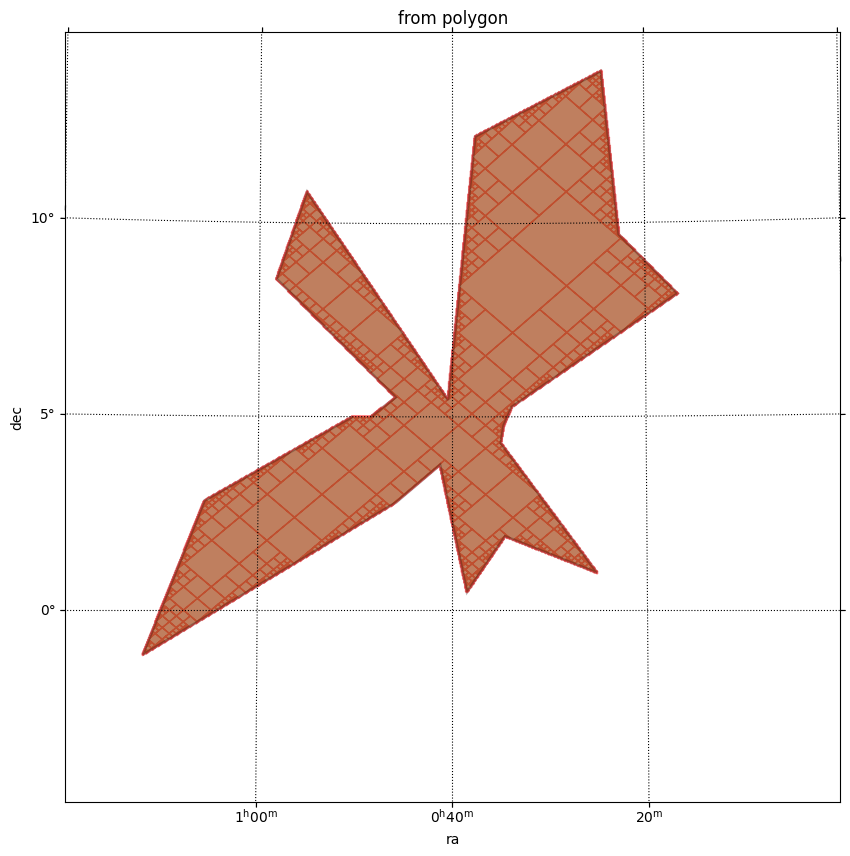

In [6]:
%%time
# Convert the vertices to lon and lat astropy quantities
lon, lat = vertices[:, 0] * u.deg, vertices[:, 1] * u.deg

skycoord = SkyCoord(lon, lat, unit="deg", frame="icrs")

# Define a vertex that is said to belongs to the MOC.
# It is important as there is no way on the sphere to know the area from
# which we want to build the MOC (a set of vertices delimits two finite areas).
moc = MOC.from_polygon(lon=lon, lat=lat, max_depth=12)
plot(moc, skycoord)